<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Forecasting_for_RES/blob/main/RegressionModels_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [ ]:
#Для работы с данными
import pandas as pd
import numpy as np

#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sn

#Для моделей регрессии
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree

#Для разделения данных на выборки
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

#Для оценивания прогноза (метрики точности)
import sklearn.metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

In [ ]:
def MAPE(y_t, y_p):
  y_t, y_p = np.array(y_t), np.array(y_p)
  Err=np.mean(np.abs((y_t - y_p)/y_t) * 100)
  return (Err)

In [ ]:
inflow_data2 = pd.read_excel('/content/Hydro_data.xlsx', sheet_name= 'Лист1')
data = pd.DataFrame(data=inflow_data2)
data

,Месяцы/годы,1,2,3,4,5,6,7,8,9,10,11,12
0,1920,565,499,440,3854,5156,2790,887,868,739,1209,1353,849
1,1921,647,598,501,3856,4086,2809,1114,1117,947,1425,1621,872
2,1922,583,552,571,2879,7278,3926,855,827,984,1258,1103,894
3,1923,533,443,390,2642,6414,1706,963,1028,880,1134,1035,713
4,1924,567,450,375,2020,8287,2644,843,895,582,1094,910,837
5,1925,662,633,570,2864,5746,3141,1453,1224,980,1295,1126,931
6,1926,607,494,438,6579,5000,2171,1034,1181,943,1562,1368,915
7,1927,616,670,611,6151,8896,3683,1391,1188,1131,1490,1491,1204
8,1928,469,349,294,3688,7556,1929,1183,954,773,978,1015,694
9,1929,648,568,565,2999,6209,2067,988,825,884,1198,1034,990


In [ ]:
# Установка первого столбца в качестве индекса строк
data.set_index(data.iloc[:, 0], inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data

,1,2,3,4,5,6,7,8,9,10,11,12
Месяцы/годы,,,,,,,,,,,,
1920,565,499,440,3854,5156,2790,887,868,739,1209,1353,849
1921,647,598,501,3856,4086,2809,1114,1117,947,1425,1621,872
1922,583,552,571,2879,7278,3926,855,827,984,1258,1103,894
1923,533,443,390,2642,6414,1706,963,1028,880,1134,1035,713
1924,567,450,375,2020,8287,2644,843,895,582,1094,910,837
1925,662,633,570,2864,5746,3141,1453,1224,980,1295,1126,931
1926,607,494,438,6579,5000,2171,1034,1181,943,1562,1368,915
1927,616,670,611,6151,8896,3683,1391,1188,1131,1490,1491,1204
1928,469,349,294,3688,7556,1929,1183,954,773,978,1015,694


In [ ]:
# Преобразование DataFrame в Series
series = data.stack()
print(series)

Месяцы/годы    
1920         1      565
             2      499
             3      440
             4     3854
             5     5156
                   ... 
1968         8      469
             9      537
             10     781
             11    1403
             12     514
Length: 588, dtype: int64


In [ ]:
data.dtypes

1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
dtype: object

In [ ]:
# Создание новой серии со сдвинутыми значениями
data_shift = series.shift(-1)[0:]
data_shift = data_shift.iloc[:-1]
data_shift

Месяцы/годы    
1920         1      499.0
             2      440.0
             3     3854.0
             4     5156.0
             5     2790.0
                    ...  
1968         7      469.0
             8      537.0
             9      781.0
             10    1403.0
             11     514.0
Length: 587, dtype: float64

In [ ]:
series = series.iloc[:-1]

In [ ]:
X = data_shift
y = series

In [ ]:
X_train = X.iloc[0:round(len(data_shift)*0.8)]
y_train = y.iloc[0:round(len(series)*0.8)]
X_test = X.iloc[round(len(data_shift)*0.8):]
y_test = y.iloc[round(len(series)*0.8):]
#сохраняем тестовую выборку на всякий случай
y_test.to_excel('/y_test.xlsx')
X_test.to_excel('/X_test.xlsx')

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

##Линейная регрессия

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
scoring  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores = cross_validate(lin_reg, X_train, y_train, scoring = scoring, cv=ShuffleSplit(n_splits=4))
y_pred = lin_reg.predict(X_test)
print('Cross-Validation errors')
DF_reg = pd.DataFrame(scores)
display(DF_reg)
print('Test errors')
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred))

Cross-Validation errors


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.001790,0.001980,0.370213,-1.517576e+06,-817.227473,-4621.353747
1,0.001636,0.001282,0.206670,-1.525612e+06,-928.693079,-3475.835663
2,0.001148,0.001832,0.111729,-4.093827e+06,-1295.551532,-7207.461607
3,0.001318,0.001628,0.066694,-2.502663e+06,-1081.011825,-5822.000352


Test errors
Mean squared error on test_set: 3299595.0601
Root Mean Square Error on test_set: 1816.4788
Root Absolute Percented Error on test_set: 149.5831
R2  on test_set: 0.2329


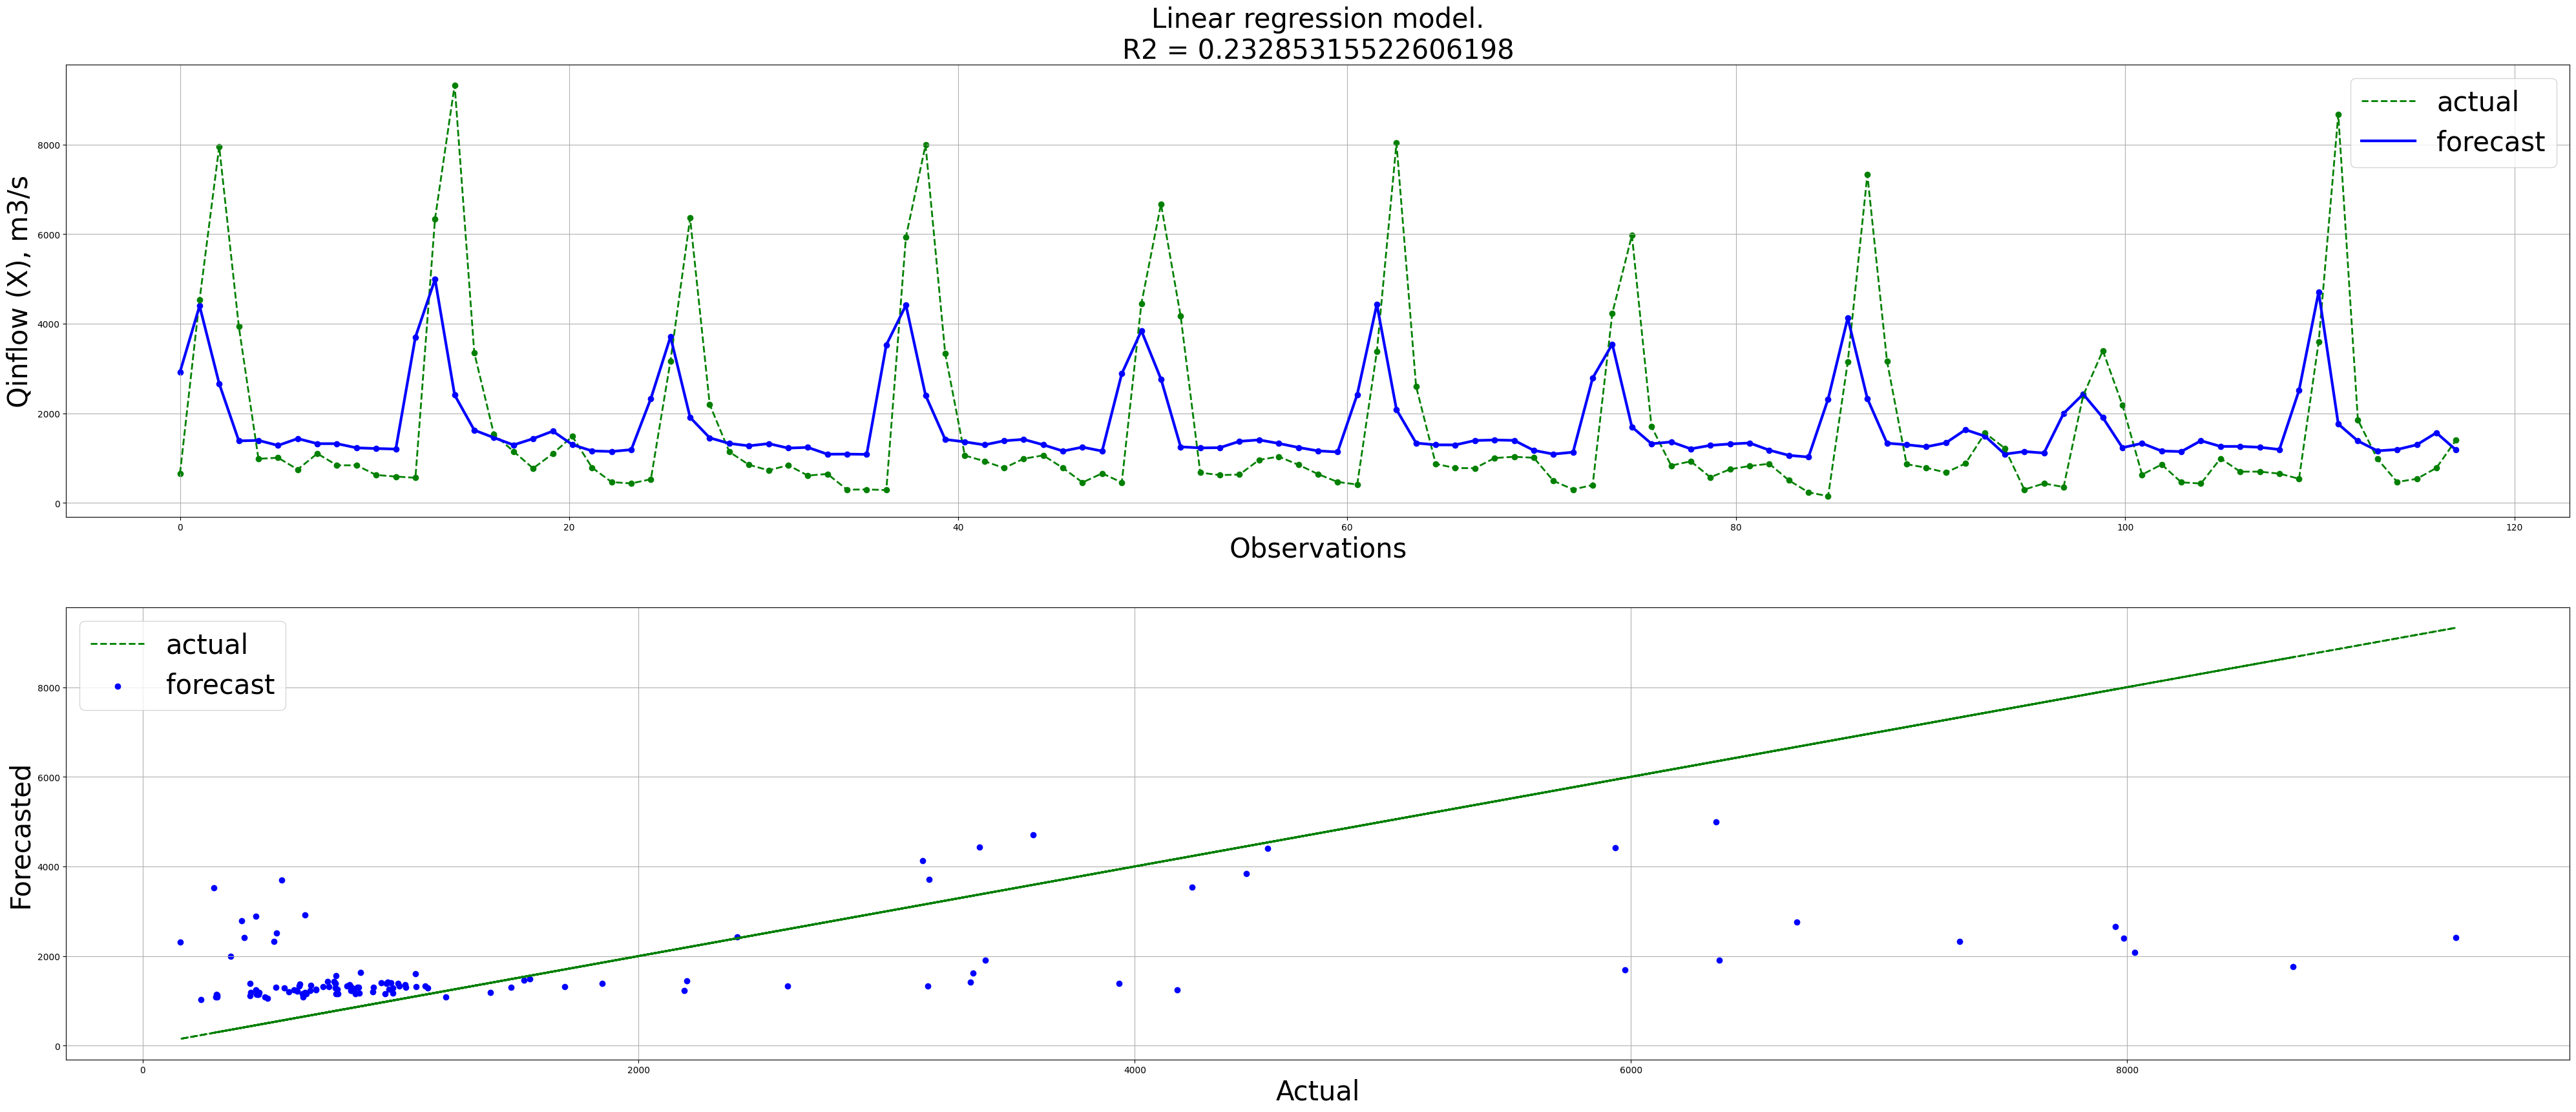

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Linear regression model.\nR2 = {r2_score(y_test,y_pred)}', fontsize=30)
plt.scatter(x, y_pred, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

##Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.pipeline import Pipeline

In [ ]:
PF = poly(degree=3, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002478,0.001520,-0.008083,-1.748732e+06,-829.772056,-4663.119485
1,0.002229,0.001521,-0.060727,-3.584841e+06,-1339.245071,-5374.376498
2,0.002906,0.001425,0.408256,-2.089418e+06,-892.393536,-4908.391203
3,0.002085,0.001403,-1.184050,-1.871282e+06,-953.803680,-3630.841464
4,0.002114,0.001513,0.304933,-3.837222e+06,-1269.961412,-5392.642960


Mean squared error on test_set: 2807062.0864
Root Mean Square Error on test_set: 1675.4289
Root Absolute Percented Error on test_set: 160.2284
R2  on test_set: 0.3474


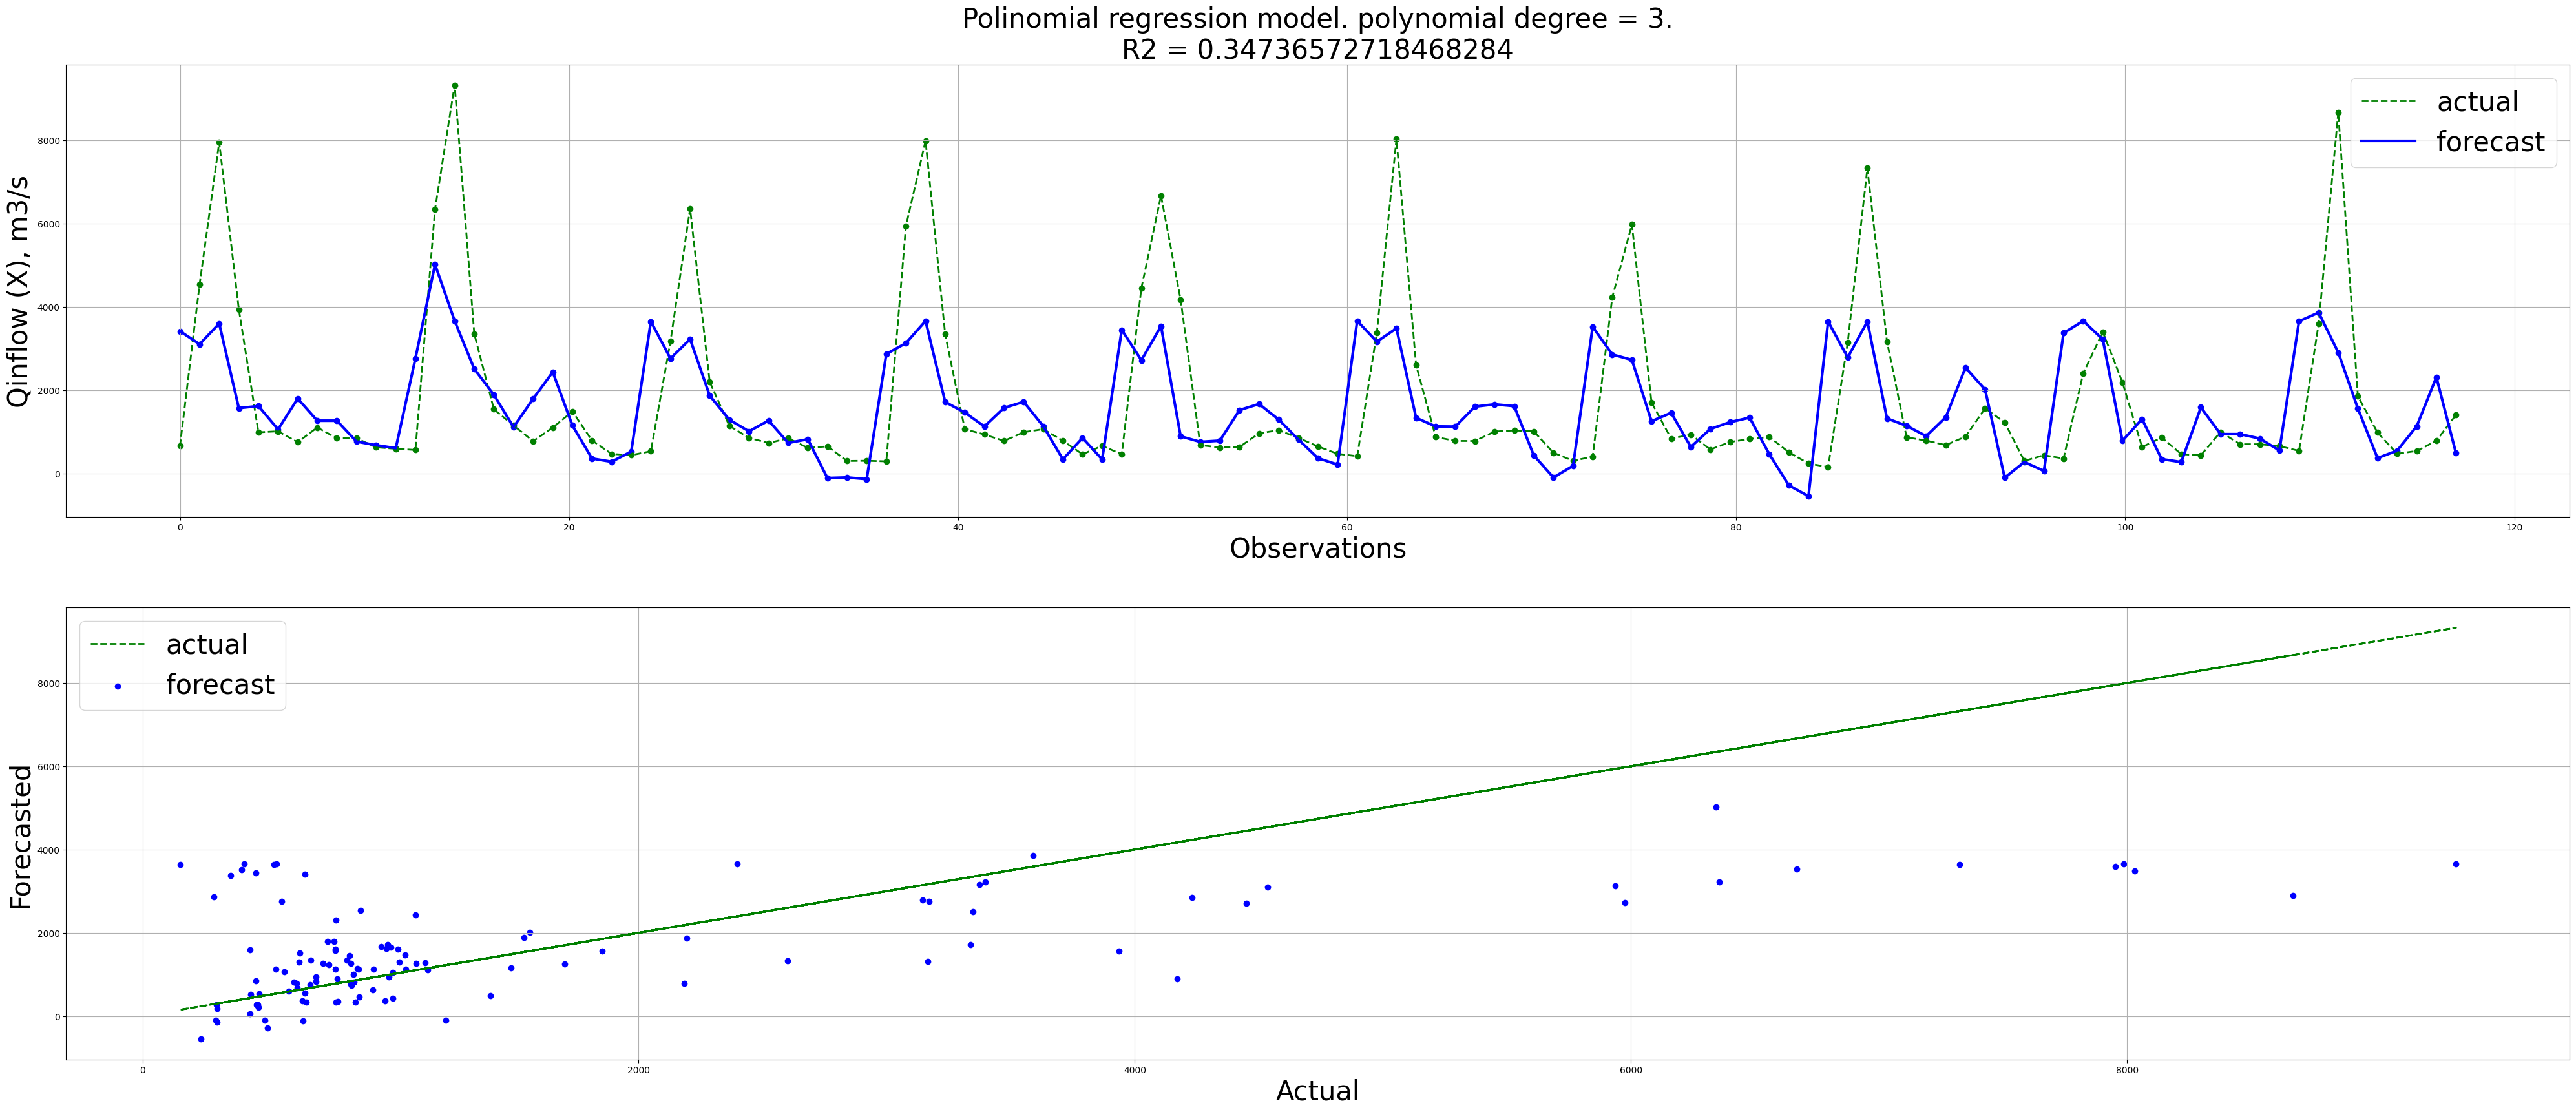

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()